## XGBデフォルト

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xgboost
import sklearn
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, make_scorer, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split, learning_curve

%matplotlib inline

In [28]:
sklearn.__version__

'0.22'

In [2]:
# pickle ファイルから読み込み
train_pkl = pd.read_pickle('./train.pk2')

In [3]:
train_pkl.shape

(850, 9)

## 訓練データとテストデータに分割

In [4]:
# 訓練とテストデータに分割
train, test = train_test_split(train_pkl, test_size=0.2, random_state=42)

In [5]:
# ターゲットと特徴量の分割
train_X = train.iloc[:, :-1]
train_y = train.disease.values

In [6]:
train_X.head(5)

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
332,2.066406,0.631348,213.935623,14.563273,47.154297,7.503906,2.302734,0.759766
383,0.817871,0.197021,214.644638,15.622564,21.059477,7.511719,3.630859,1.291016
281,0.791992,0.082642,358.339508,12.924613,25.772480,8.648438,4.324219,1.319336
2,0.657227,0.081299,320.770538,12.625011,30.613180,5.949219,2.488281,0.774902
231,1.714844,0.511230,215.885971,27.669710,60.709866,5.953125,3.117188,1.218750


## 訓練データで訓練

In [36]:
XGB = XGBClassifier(randam_seed=42)

In [8]:
XGB = XGB.fit(train_X, train_y)

In [9]:
XGB.feature_importances_

array([0.29704314, 0.10873017, 0.09045416, 0.11313919, 0.18338084,
       0.06405498, 0.05146103, 0.09173649], dtype=float32)

In [10]:
sorted(
    zip(map(lambda x: round(x, 3), XGB.feature_importances_), train.iloc[:, :-1].columns),
    reverse=True)

[(0.297, 'T_Bil'),
 (0.183, 'AST_GOT'),
 (0.113, 'ALT_GPT'),
 (0.109, 'D_Bil'),
 (0.092, 'AG_ratio'),
 (0.09, 'ALP'),
 (0.064, 'TP'),
 (0.051, 'Alb')]

## テストデータで実行

In [11]:
# ターゲットと特徴量の分割
test_x = test.iloc[:, :-1]
test_y = test.disease.values

In [12]:
test_x.shape, test_y.shape

((170, 8), (170,))

In [13]:
pred_y = XGB.predict(test_x)

In [14]:
confusion_matrix(test_y, pred_y)

array([[88,  5],
       [16, 61]], dtype=int64)

In [15]:
accuracy_score(test_y, pred_y)

0.8764705882352941

In [17]:
np.sum(test_y), np.sum(pred_y)

(77, 66)

## ROC曲線

In [19]:
fpr, tpr, logreg = roc_curve(test_y, pred_y)

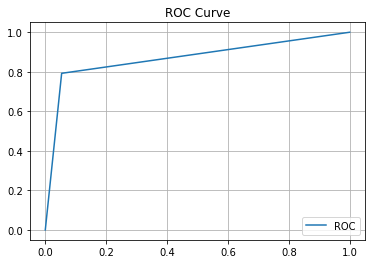

In [25]:
plt.plot(fpr, tpr, label='ROC')
plt.title('ROC Curve')
plt.grid(True)
plt.legend(loc='lower right', fontsize=10)

## 学習曲線

In [63]:
XGB2 = XGBClassifier(randam_seed=42, reg_lambda=2, reg_alpha=2)

In [64]:
train_size, train_scores, test_scores = \
learning_curve(estimator=XGB2, X=train_X, y=train_y, 
               train_sizes=np.linspace(0.1, 1.0, 10))

In [65]:
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

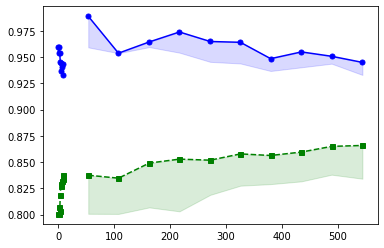

In [66]:
plt.plot(train_size, train_mean+train_std, train_mean-train_std, color='blue', marker='o', markersize=5, label='training accuracy')
plt.plot(train_size, test_mean+test_std, test_mean-test_std, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

plt.fill_between(train_size, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
plt.fill_between(train_size, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')


In [67]:
sorted(
    zip(map(lambda x: round(x, 3), XGB2.feature_importances_), train.iloc[:, :-1].columns),
    reverse=True)

XGBoostError: need to call fit or load_model beforehand

## 検証データで実行

In [ ]:
# 検証データ読み込み
valid = pd.read_pickle('./test.pk2')

In [ ]:
valid.shape

In [ ]:
type(valid)

In [ ]:
# ID の保存
# valid_pass = valid.id.values

In [ ]:
# valid_X = valid.iloc[:, 1:]
valid_X = valid.copy()

In [ ]:
valid_X.shape, train_X.shape

In [ ]:
pred_valid_y = XGB.predict(valid_X)

In [ ]:
pred_valid_y.shape

In [ ]:
# type(valid_pass), type(pred_valid_y)

In [ ]:
result_df = pd.DataFrame(pred_valid_y)

In [ ]:
result_df.to_csv("./XGB_3.csv", header=False)